In [47]:
import torch
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from IPython.display import Image, display
%matplotlib inline

In [2]:
import os

In [3]:
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt')

Using cache found in C:\Users\abhay/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-16 Python-3.11.3 torch-2.3.1+cpu CPU

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


In [135]:
def detect_and_draw_boxes(image_path, model, save_path=None):
    max_height=640
    max_width=480
    '''Detect signatures, draw boxes on the image, and optionally save it.'''
    img = cv2.imread(image_path)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Convert single channel grayscale image to 3 channels
    #img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    page_height, page_width = img.shape[:2]

    # Scale the image while maintaining aspect ratio
    scaling_factor = min(max_height / page_height, max_width / page_width)
    new_height = int(page_height * scaling_factor)
    new_width = int(page_width * scaling_factor)
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Convert to black and white
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        
    results = model(img)
    detections = results.xyxy[0].numpy()  # xyxy format

    for det in detections:
        x1, y1, x2, y2, conf, cls = det
        img = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    if save_path:
        cv2.imwrite(save_path, img)
        print(f'Saved image with boxes to {save_path}')

    return img, detections

def get_detected_region(image, box, save_path=None):
    '''Extracts the region inside the box from the image, excluding the box thickness.'''
    x1, y1, x2, y2 = map(int, box[:4])
    box_thickness = 2
    # Adjust the coordinates to exclude the box thickness
    x1_adjusted = x1 + box_thickness
    y1_adjusted = y1 + box_thickness
    x2_adjusted = x2 - box_thickness
    y2_adjusted = y2 - box_thickness
    
    # Ensure coordinates are within bounds
    x1_adjusted = max(x1_adjusted, 0)
    y1_adjusted = max(y1_adjusted, 0)
    x2_adjusted = min(x2_adjusted, image.shape[1])
    y2_adjusted = min(y2_adjusted, image.shape[0])
    
    # Crop the region
    region = image[y1_adjusted:y2_adjusted, x1_adjusted:x2_adjusted]
    
    if save_path:
        cv2.imwrite(save_path, region)
        print(f'Saved cropped region to {save_path}')
    
    return region

In [168]:
image1_path = "Test3.jpg"
save_path1 = os.path.join(os.getcwd(), 'image1_with_boxes.jpg')
cropped_save_path1 = os.path.join(os.getcwd(), 'region1.jpg')

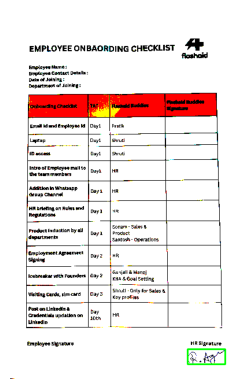

Saved image with boxes to C:\Users\abhay\Flashaid\signature_verify\Signature-Verification_System_using_YOLOv5-and-CycleGAN\Training\VGG16 FE\image1_with_boxes.jpg
Saved cropped region to C:\Users\abhay\Flashaid\signature_verify\Signature-Verification_System_using_YOLOv5-and-CycleGAN\Training\VGG16 FE\region1.jpg


In [172]:
img1, detections1 = detect_and_draw_boxes(image1_path, yolo_model, save_path1)
region1 = get_detected_region(img1, detections1[-1], cropped_save_path1)

In [209]:
image2_path = "Test4.jpg"
save_path2 = os.path.join(os.getcwd(), 'image2_with_boxes.jpg')
cropped_save_path2 = os.path.join(os.getcwd(), 'region2.jpg')

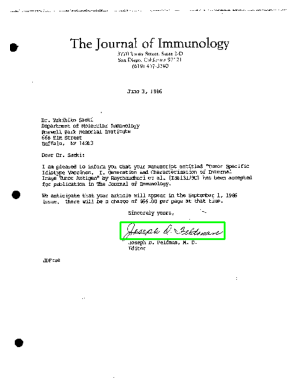

Saved image with boxes to C:\Users\abhay\Flashaid\signature_verify\Signature-Verification_System_using_YOLOv5-and-CycleGAN\Training\VGG16 FE\image2_with_boxes.jpg
Saved cropped region to C:\Users\abhay\Flashaid\signature_verify\Signature-Verification_System_using_YOLOv5-and-CycleGAN\Training\VGG16 FE\region2.jpg


In [210]:
img2, detections2 = detect_and_draw_boxes(image2_path, yolo_model, save_path2)
region2 = get_detected_region(img2, detections2[-1], cropped_save_path2)

In [211]:
display(Image(filename='region1.jpg'))

In [212]:
display(Image(filename='region2.jpg'))